# Regularized Cumulative Sum

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import scipy.sparse
import h5py

import regu
import lsquares

## Synthetic example

In [3]:
def gaussian(dim=100, sigma=.2):
    x, y = np.meshgrid(np.linspace(-1, 1, dim),
                       np.linspace(-1, 1, dim))
    dst = np.sqrt(x**2+y**2)

    gauss = np.exp(-((dst)**2 / (2.0 * sigma**2)))
    
    return gauss

# Make fake topo
orig = gaussian(dim=100)

# Calculate gradient, add noise
grid = np.diff(orig, axis=1)
grid += np.random.normal(loc = 0, scale=.015, size=grid.shape)

# Cumulative sum
xint = np.cumsum(grid, axis=1)

# Regularized cumulative sum
Agr, bgr = regu.makeSystem(grid, lamx=.005, lamy=.15)
print("System generated")
x = scipy.sparse.linalg.lsqr(Agr, bgr)[0].reshape(grid.shape[0], grid.shape[1]+1)
print("Solved")


System generated
Solved


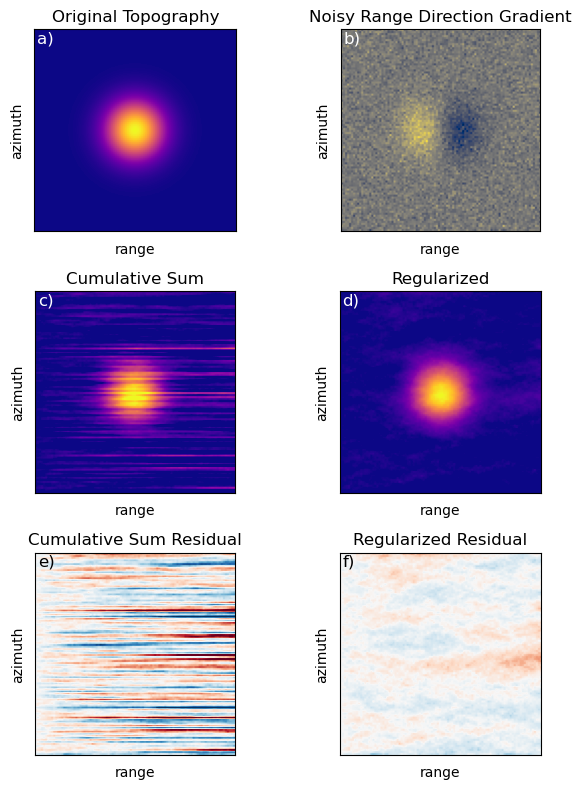

Cumulative sum misfit norm: 11.097
Regularized misfit norm: 3.074


In [4]:
# Plot
fig, axs = plt.subplots(3, 2, figsize=(6.5, 8))

axs[0,0].imshow(orig, cmap="plasma", vmin=0, vmax=1)
axs[0,0].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Original Topography")
axs[0,0].annotate("a)", (1,6), color="w", fontsize=12)

axs[0,1].imshow(grid, cmap="cividis")
axs[0,1].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Noisy Range Direction Gradient")
axs[0,1].annotate("b)", (1,6), color="w", fontsize=12)

axs[1,0].imshow(xint, cmap="plasma", vmin=0, vmax=1)
axs[1,0].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Cumulative Sum")
axs[1,0].annotate("c)", (1,6), color="w", fontsize=12)

axs[1,1].imshow(x, cmap="plasma", vmin=0, vmax=1)
axs[1,1].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Regularized")
axs[1,1].annotate("d)", (1,6), color="w", fontsize=12)

axs[2,0].imshow(xint-orig[:,1:], cmap="RdBu_r", vmin=-0.3, vmax=0.3)
axs[2,0].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Cumulative Sum Residual")
axs[2,0].annotate("e)", (1,6), color="k", fontsize=12)

axs[2,1].imshow(x-orig, cmap="RdBu_r", vmin=-0.3, vmax=0.3)
axs[2,1].set(xticks=[], yticks=[], xlabel="range", ylabel="azimuth", title="Regularized Residual")
axs[2,1].annotate("f)", (1,6), color="k", fontsize=12)


fig.tight_layout()
plt.savefig("synthetic.pdf", dpi=150, bbox_inches="tight")
plt.show()

print("Cumulative sum misfit norm: %.3f" % np.linalg.norm(orig[:,1:]-xint))
print("Regularized misfit norm: %.3f" % np.linalg.norm(orig-x))

## Shishaldin

In [7]:
key = '20191029'

# SAR image
fd = h5py.File("./descending.h5", mode="r")
amp = fd[key]["amps"][:]
fd.close()

dem = lsquares.getdem(key)

Start gradient for 20191029
Finished gradient for 20191029
Start integration for 20191029
Finished integration for 20191029


In [9]:
demReg = regu.getdemreg(key, rangeCrop=(0,1000))

Start gradient for 20191029
Finished gradient for 20191029
System generated for 20191029
Solved 20191029


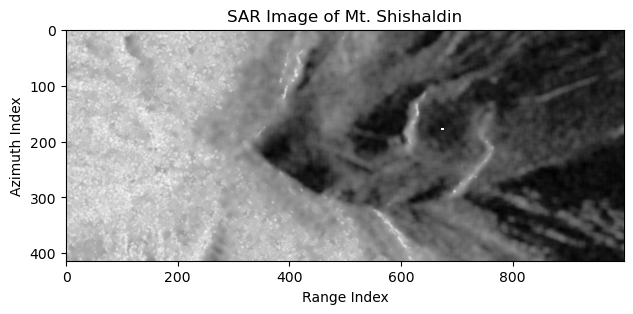

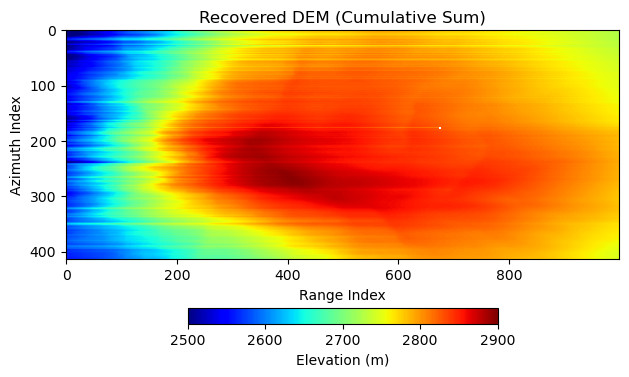

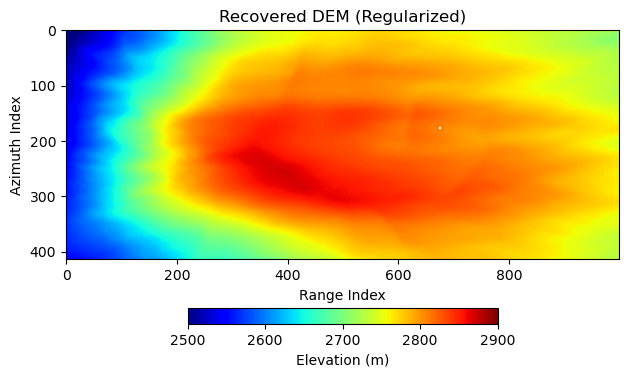

In [18]:
plt.figure(figsize=(8, 3))
plt.imshow(np.log10(amp[:,:1000]), cmap="Greys_r", aspect=1)
plt.xlabel("Range Index")
plt.ylabel("Azimuth Index")
plt.title("SAR Image of Mt. Shishaldin")

plt.figure(figsize=(8, 4.25))
plt.imshow(dem[:,:1000], cmap="jet", aspect=1, vmin=2500, vmax=2900)
plt.xlabel("Range Index")
plt.ylabel("Azimuth Index")
plt.title("Recovered DEM (Cumulative Sum)")
plt.colorbar(label="Elevation (m)", shrink=.5, aspect=20, location="bottom")

plt.figure(figsize=(8, 4.25))
plt.imshow(demReg, cmap="jet", aspect=1, vmin=2500, vmax=2900)
plt.xlabel("Range Index")
plt.ylabel("Azimuth Index")
plt.title("Recovered DEM (Regularized)")
plt.colorbar(label="Elevation (m)", shrink=.5, aspect=20, location="bottom")